In [1]:
# 한글폰트 설치

# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
import urllib.request

urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/tykimos/tykimos.github.io/master/warehouse/dataset/tarr_train.txt",
    filename="tarr_train.txt",
)

('tarr_train.txt', <http.client.HTTPMessage at 0x7e16a0b70280>)

In [3]:
# 정형데이터 분석 >> 판다스

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# load file

train_file_path = "tarr_train.txt"
pd.read_csv(train_file_path, sep='\t')

,id,comment,label
0,1,여기 음식은 언제 와도 실망시키지 않아요. 최고!,1
1,2,여기 라멘 진짜 ㄹㅇ 맛있어요. 국물이 진하고 면도 쫄깃해서 너무 좋았습니다.,1
2,3,"진짜 깔끔하고, 맛도 좋았어요. 추천합니다!",1
3,4,왜 이렇게 유명한지 모르겠음ㅋㅋ ㄹㅈㄷ 맛없음,0
4,5,인생 타르트를 여기서 만났어요❤️ 달지 않고 고소해서 정말 추천합니다!,1
...,...,...,...
295,296,와우! 여기 라떼아트 진짜 예술이네요. 인스타갬성!!,1
296,297,"처음 와봤는데, 여기 분위기도 좋고 음식도 맛있어요. 좋은 경험이었어요!",1
297,298,음... 여기 리뷰 왜 이래? 사진으로 봤을 때랑 너무 다르네요.,0
298,299,직원들이 너무 친절해서 기분 좋게 먹고 왔습니다. 굿굿!,1


In [5]:
train_data = pd.read_csv(train_file_path, sep='\t')
train_data.head(3)

,id,comment,label
0,1,여기 음식은 언제 와도 실망시키지 않아요. 최고!,1
1,2,여기 라멘 진짜 ㄹㅇ 맛있어요. 국물이 진하고 면도 쫄깃해서 너무 좋았습니다.,1
2,3,"진짜 깔끔하고, 맛도 좋았어요. 추천합니다!",1


In [6]:
len(train_data)

300

In [7]:
train_data['comment']

0                      여기 음식은 언제 와도 실망시키지 않아요. 최고!
1      여기 라멘 진짜 ㄹㅇ 맛있어요. 국물이 진하고 면도 쫄깃해서 너무 좋았습니다.
2                         진짜 깔끔하고, 맛도 좋았어요. 추천합니다!
3                        왜 이렇게 유명한지 모르겠음ㅋㅋ ㄹㅈㄷ 맛없음
4          인생 타르트를 여기서 만났어요❤️ 달지 않고 고소해서 정말 추천합니다!
                          ...                     
295                  와우! 여기 라떼아트 진짜 예술이네요. 인스타갬성!!
296       처음 와봤는데, 여기 분위기도 좋고 음식도 맛있어요. 좋은 경험이었어요!
297           음... 여기 리뷰 왜 이래? 사진으로 봤을 때랑 너무 다르네요.
298                직원들이 너무 친절해서 기분 좋게 먹고 왔습니다. 굿굿!
299            제 입맛엔 안 맞았어요. 다른 분들은 괜찮았을지 모르겠지만...
Name: comment, Length: 300, dtype: object

In [8]:
train_data['comment'].apply(len)

0      27
1      43
2      24
3      25
4      39
       ..
295    29
296    40
297    36
298    31
299    35
Name: comment, Length: 300, dtype: int64

In [9]:
train_data['comment_length'] = train_data['comment'].apply(len)

In [10]:
train_data['comment_length'].describe()

count    300.000000
mean      31.236667
std       10.682120
min        5.000000
25%       25.000000
50%       30.000000
75%       35.000000
max       92.000000
Name: comment_length, dtype: float64

In [11]:
comment_length_statistics = train_data['comment_length'].describe()

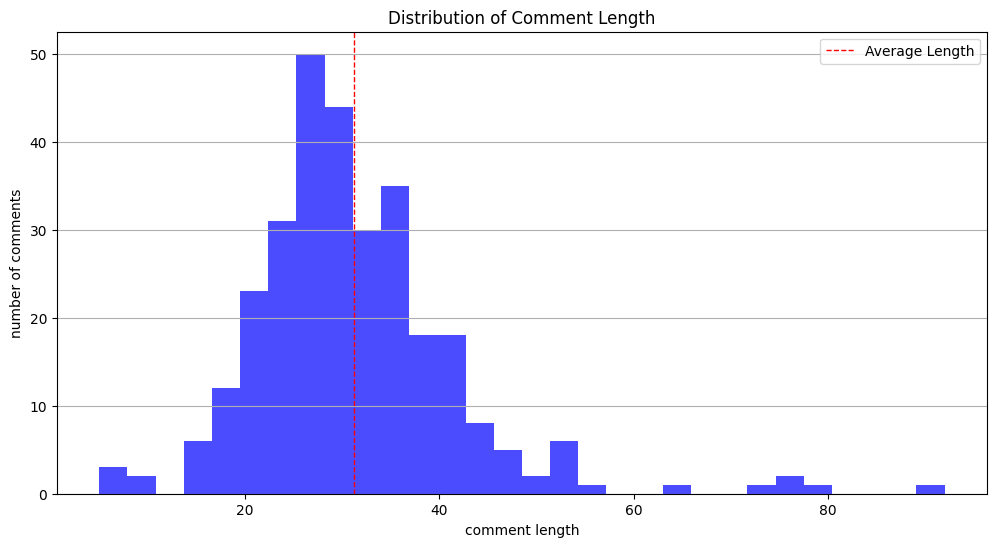

In [12]:
# matplotlib

plt.figure(figsize=(12,6))
plt.hist(train_data['comment_length'], bins=30, color='blue', alpha=0.7)
plt.axvline(train_data['comment_length'].mean(), color='red', linestyle='dashed',
            linewidth=1, label='Average Length')
plt.title('Distribution of Comment Length')
plt.xlabel('comment length')
plt.ylabel('number of comments')
plt.legend()
plt.grid(axis='y')

plt.show()

In [13]:
train_data['label'].value_counts()

label
1    162
0    138
Name: count, dtype: int64

In [14]:
label_count = train_data['label'].value_counts()

In [15]:
train_data['label'].value_counts(normalize=True)

label
1    0.54
0    0.46
Name: proportion, dtype: float64

In [16]:
label_distribution = train_data['label'].value_counts(normalize=True)

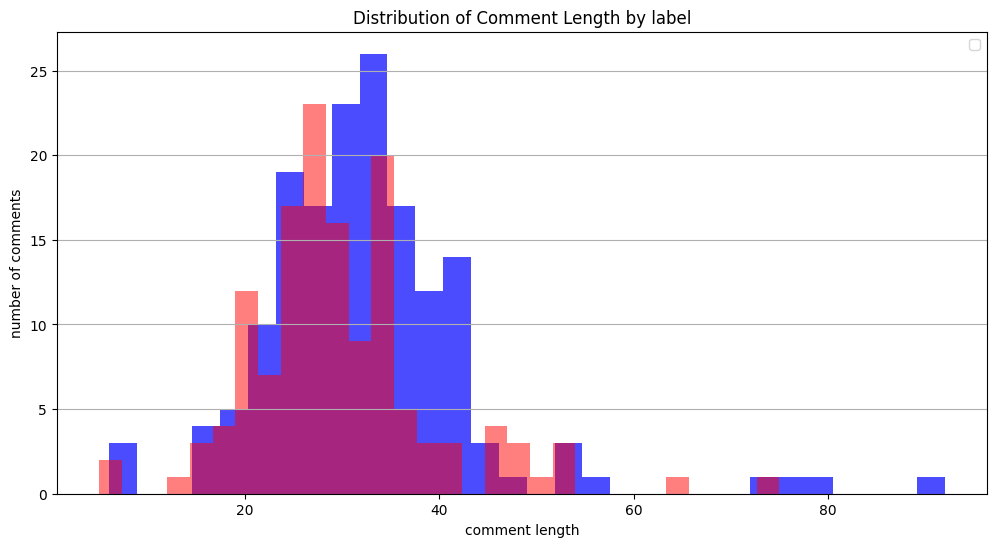

In [17]:
plt.figure(figsize=(12,6))
plt.hist(train_data[train_data['label'] == 1]['comment_length'] , bins=30, color='blue', alpha=0.7)
plt.hist(train_data[train_data['label'] == 0]['comment_length'] , bins=30, color='red', alpha=0.5)
plt.title('Distribution of Comment Length by label')
plt.xlabel('comment length')
plt.ylabel('number of comments')
plt.legend()
plt.grid(axis='y')

plt.show()

In [18]:
from collections import Counter
import re

In [19]:
def get_word_frequencies(texts):
    words =[]
    for text in texts:
        words.extend(re.findall(r'\b\w+\b', text))
        # 구두점 제거 >> 공백 기준, 토큰화

    return Counter(words)
    # 단어 빈도수 계산

In [20]:
train_data[train_data['label'] == 1]

,id,comment,label,comment_length
0,1,여기 음식은 언제 와도 실망시키지 않아요. 최고!,1,27
1,2,여기 라멘 진짜 ㄹㅇ 맛있어요. 국물이 진하고 면도 쫄깃해서 너무 좋았습니다.,1,43
2,3,"진짜 깔끔하고, 맛도 좋았어요. 추천합니다!",1,24
4,5,인생 타르트를 여기서 만났어요❤️ 달지 않고 고소해서 정말 추천합니다!,1,39
5,6,메뉴 설명을 너무 친절하게 해주셔서 고르기 수월했어요.,1,30
...,...,...,...,...
290,291,음식 사진 찍기 좋아요. 인스타에 올릴 만해요!,1,26
294,295,"다 좋은데, 음악 볼륨만 좀 낮추면 완벽할 것 같아요!",1,30
295,296,와우! 여기 라떼아트 진짜 예술이네요. 인스타갬성!!,1,29
296,297,"처음 와봤는데, 여기 분위기도 좋고 음식도 맛있어요. 좋은 경험이었어요!",1,40


In [21]:
train_data[train_data['label'] == 1]['comment']

0                      여기 음식은 언제 와도 실망시키지 않아요. 최고!
1      여기 라멘 진짜 ㄹㅇ 맛있어요. 국물이 진하고 면도 쫄깃해서 너무 좋았습니다.
2                         진짜 깔끔하고, 맛도 좋았어요. 추천합니다!
4          인생 타르트를 여기서 만났어요❤️ 달지 않고 고소해서 정말 추천합니다!
5                   메뉴 설명을 너무 친절하게 해주셔서 고르기 수월했어요.
                          ...                     
290                     음식 사진 찍기 좋아요. 인스타에 올릴 만해요!
294                 다 좋은데, 음악 볼륨만 좀 낮추면 완벽할 것 같아요!
295                  와우! 여기 라떼아트 진짜 예술이네요. 인스타갬성!!
296       처음 와봤는데, 여기 분위기도 좋고 음식도 맛있어요. 좋은 경험이었어요!
298                직원들이 너무 친절해서 기분 좋게 먹고 왔습니다. 굿굿!
Name: comment, Length: 162, dtype: object

In [22]:
positive_comments = train_data[train_data['label'] == 1]['comment']
negative_comments = train_data[train_data['label'] == 0]['comment']

In [23]:
print(positive_comments[:3])
print()
print(negative_comments[:3])

0                    여기 음식은 언제 와도 실망시키지 않아요. 최고!
1    여기 라멘 진짜 ㄹㅇ 맛있어요. 국물이 진하고 면도 쫄깃해서 너무 좋았습니다.
2                       진짜 깔끔하고, 맛도 좋았어요. 추천합니다!
Name: comment, dtype: object

3        왜 이렇게 유명한지 모르겠음ㅋㅋ ㄹㅈㄷ 맛없음
6           사진과 음식이 너무 달라서 실망했습니다.
8    솔직히...? 맛이 그닥이에요. 리뷰랑 너무 다르네.
Name: comment, dtype: object


In [24]:
print(get_word_frequencies(positive_comments))

Counter({'여기': 31, '진짜': 23, '너무': 23, '좋아요': 16, '정말': 14, '이런': 14, '같아요': 11, '맛있어요': 9, '좋았어요': 8, '또': 8, '것': 8, '좋은': 8, '왔는데': 8, '메뉴': 7, '음식도': 7, '잘': 7, '우리': 7, '좀': 7, '음식은': 6, '최고': 6, '자주': 6, '이렇게': 6, '꼭': 6, '처음': 6, '분위기도': 6, '맛': 6, '딱': 6, '오랜만에': 6, '곳': 6, '와': 6, 'ㄹㅇ': 5, '좋았습니다': 5, '추천합니다': 5, 'ㅋㅋ': 5, '안': 5, '왜': 5, '이제야': 5, '여기는': 5, '친절해서': 5, '기분': 5, '좋게': 5, '있어서': 5, '거': 5, '모두': 5, '이': 5, '맛도': 4, '대박': 4, '곳이': 4, '다들': 4, '요기': 4, '좋고': 4, '분위기': 4, '맛있었어요': 4, '맛이': 4, '수': 4, '맛을': 4, '부드럽고': 4, '다시': 4, '음식이': 4, '음식': 4, '싶네요': 4, '언제': 3, '와도': 3, '가격도': 3, '다음에': 3, '앞으로': 3, '올': 3, '게': 3, 'ㅎㅎ': 3, '와서': 3, '먹었어요': 3, '메뉴도': 3, '맛있더라고요': 3, '오고': 3, '그냥': 3, '맛집을': 3, '맛있어서': 3, '좋아하시는': 3, '분들': 3, '와봤는데': 3, '훌륭했어요': 3, '괜찮았어요': 3, '직원들이': 3, '식사하는': 3, '서비스가': 3, '특히': 3, '친구': 3, '사진': 3, '그': 3, '있는': 3, '먹고': 3, '우와': 3, '데이트하기': 3, '다른': 3, '여긴': 3, '곳을': 3, '가격에': 3, '대박이에요': 3, '그래도': 3, '국물이': 2, '인생': 2, '않고': 2, '해주셔서': 2, 

In [25]:
positive_word_freq = get_word_frequencies(positive_comments)
negative_word_freq = get_word_frequencies(negative_comments)

In [26]:
print(negative_word_freq)

Counter({'너무': 42, '좀': 23, '안': 20, '같아요': 14, '음식이': 13, '것': 13, '올': 11, '여기': 10, '그냥': 10, '왔는데': 9, '이런': 9, '왜': 8, '맛이': 8, '이렇게': 7, '별로였어요': 7, '전': 7, '다른': 6, '다신': 6, '다': 6, '다시': 6, '솔직히': 5, '늦게': 5, '음식도': 5, '음식': 5, '가격': 5, 'ㅠㅠ': 5, '음': 5, '리뷰': 5, '리뷰보고': 4, '주문한': 4, '기대': 4, '조금': 4, '더': 4, '짜서': 4, '계속': 4, '그랬어요': 4, '다시는': 4, '걸': 4, '불편했어요': 4, '좋은데': 4, '내': 4, '듯': 4, '힘들었어요': 4, '기다리는': 3, '이하였습니다': 3, '나오고': 3, '거': 3, '서비스가': 3, '떨어진': 3, '대비': 3, '태도가': 3, '불친절해서': 3, '기분이': 3, '뭐': 3, '서비스': 3, '차': 3, '와': 3, '이': 3, '직원들': 3, '별로': 3, '1시간': 3, '음식은': 3, '별로였습니다': 3, '분들은': 3, '제': 3, '주고': 3, '시끄러워서': 3, '여긴': 3, '가격이': 3, '좋아서': 3, '진짜': 3, '청결': 3, '해주세요': 3, '이래': 3, '달라서': 2, '나와서': 2, '나오지': 2, '않아서': 2, '뭐가': 2, '그닥': 2, '실망이에요': 2, '소리가': 2, '이전에': 2, '때보다': 2, '많이': 2, '했는데': 2, '좋겠어요': 2, '음식의': 2, '양이': 2, '맛은': 2, '분위기는': 2, '좋았습니다': 2, '주문한지': 2, '주차공간이': 2, '협소해서': 2, '불편했습니다': 2, '최악의': 2, '가게': 2, '될': 2, '직원분이': 2, '주차장이': 2, 'ㄴㅇㄱ

In [27]:
positive_word_freq.most_common(10)

[('여기', 31),
 ('진짜', 23),
 ('너무', 23),
 ('좋아요', 16),
 ('정말', 14),
 ('이런', 14),
 ('같아요', 11),
 ('맛있어요', 9),
 ('좋았어요', 8),
 ('또', 8)]

In [28]:
top_positive_words = positive_word_freq.most_common(10)

In [29]:
negative_word_freq.most_common(10)

[('너무', 42),
 ('좀', 23),
 ('안', 20),
 ('같아요', 14),
 ('음식이', 13),
 ('것', 13),
 ('올', 11),
 ('여기', 10),
 ('그냥', 10),
 ('왔는데', 9)]

In [30]:
top_negative_words = negative_word_freq.most_common(10)

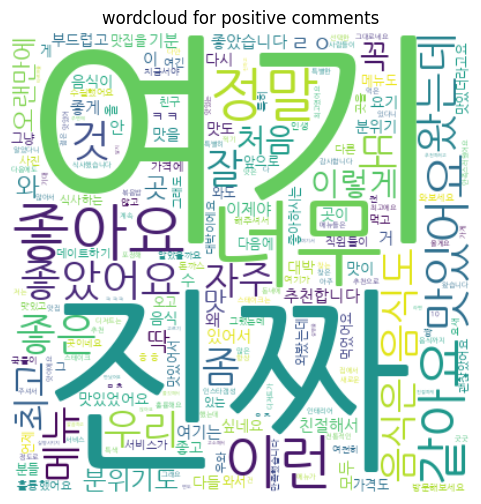

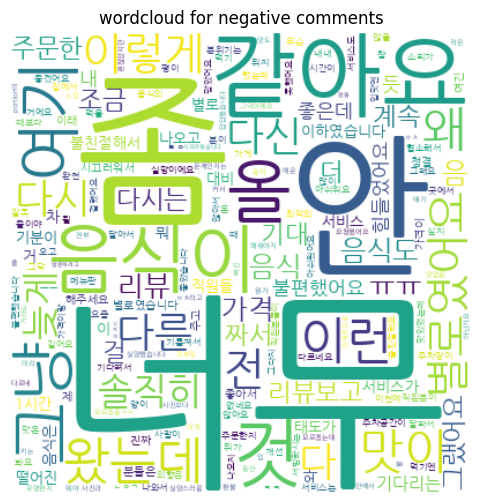

In [31]:
# 시각화 - 워드클라우드

from wordcloud import WordCloud

def generate_wordcloud(word_freq, title):
    wc = WordCloud(width=400, height=400, background_color='white',font_path='NanumGothic.ttf').generate_from_frequencies(word_freq)
    plt.figure(figsize=(6,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

generate_wordcloud(positive_word_freq, 'wordcloud for positive comments')
generate_wordcloud(negative_word_freq, 'wordcloud for negative comments')

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, ngram_range, top_n):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    # 각 n-gram 의 총 빈도 계산
    # >> 결과물 : n-gram 빈도를 나타내는 행렬
    sum_words = bag_of_words.sum(axis=0)
    # n-gram과 그 빈도를 리스트로 변환
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x:x[1], reverse=True)
    # key=lambda x:x[1] (word, freq) >> tuple 2번째 요소(빈도수) 기준 , 내림차순 정렬
    return words_freq[:top_n]

In [33]:
# ngram_range
# n-그램의 범위를 지정하는 튜플.
# 예를 들어, (1, 2)는 유니그램과 바이그램을 모두 포함
# top_n: 반환할 상위 n개의 n-그램의 수

# vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
# fit(corpus) 메소드를 사용하여 주어진 corpus에 대해 피팅(fitting)을 수행
# >> 이 과정에서 각 n-그램에 대한 어휘 사전을 구축

In [34]:
# top bigram, trigram

get_top_ngrams(train_data['comment'], ngram_range=(2,2), top_n=10)
# ngram_range=(2,2) :bigram 추출 (두 단어로 구성된 n-gram)

[('음식이 너무', 8),
 ('너무 친절해서', 5),
 ('친절해서 기분', 5),
 ('기분 좋게', 5),
 ('너무 짜서', 4),
 ('그냥 그랬어요', 4),
 ('분위기도 좋고', 4),
 ('서비스가 너무', 4),
 ('진짜 ㄹㅇ', 3),
 ('리뷰보고 왔는데', 3)]

In [35]:
top_bigrams = get_top_ngrams(train_data['comment'], ngram_range=(2,2), top_n=10)
top_trigrams = get_top_ngrams(train_data['comment'], ngram_range=(3,3), top_n=10)

In [36]:
top_bigrams

[('음식이 너무', 8),
 ('너무 친절해서', 5),
 ('친절해서 기분', 5),
 ('기분 좋게', 5),
 ('너무 짜서', 4),
 ('그냥 그랬어요', 4),
 ('분위기도 좋고', 4),
 ('서비스가 너무', 4),
 ('진짜 ㄹㅇ', 3),
 ('리뷰보고 왔는데', 3)]

In [37]:
top_trigrams

[('너무 친절해서 기분', 5),
 ('친절해서 기분 좋게', 5),
 ('음식도 늦게 나오고', 3),
 ('분위기도 좋고 음식도', 3),
 ('직원들이 너무 친절해서', 3),
 ('진짜 ㄹㅇ 맛있어요', 2),
 ('음식이 너무 늦게', 2),
 ('이런 맛집을 지금서야', 2),
 ('왔을 때보다 서비스가', 2),
 ('많이 떨어진 같아요', 2)]

In [38]:
get_top_ngrams(train_data[train_data['label'] ==1]['comment'], ngram_range=(2,2), top_n=10)

[('너무 친절해서', 5),
 ('친절해서 기분', 5),
 ('기분 좋게', 5),
 ('분위기도 좋고', 4),
 ('진짜 ㄹㅇ', 3),
 ('이런 맛집을', 3),
 ('좋아하시는 분들', 3),
 ('처음 와봤는데', 3),
 ('좋고 음식도', 3),
 ('직원들이 너무', 3)]

In [39]:
get_top_ngrams(train_data[train_data['label'] ==1]['comment'], ngram_range=(3,3), top_n=10)

[('너무 친절해서 기분', 5),
 ('친절해서 기분 좋게', 5),
 ('분위기도 좋고 음식도', 3),
 ('직원들이 너무 친절해서', 3),
 ('진짜 ㄹㅇ 맛있어요', 2),
 ('이런 맛집을 지금서야', 2),
 ('좋아하시는 분들 와보세요', 2),
 ('여기 인테리어 너무', 2),
 ('친구 추천으로 왔는데', 2),
 ('사진 찍기 좋아요', 2)]

In [40]:
get_top_ngrams(train_data[train_data['label'] ==0]['comment'], ngram_range=(2,2), top_n=10)

[('음식이 너무', 7),
 ('너무 짜서', 4),
 ('그냥 그랬어요', 4),
 ('리뷰보고 왔는데', 3),
 ('기대 이하였습니다', 3),
 ('음식도 늦게', 3),
 ('늦게 나오고', 3),
 ('떨어진 같아요', 3),
 ('가격 대비', 3),
 ('너무 시끄러워서', 3)]

In [41]:
top_bigrams_positive = get_top_ngrams(train_data[train_data['label'] ==1]['comment'], ngram_range=(2,2), top_n=10)
top_trigrams_positive = get_top_ngrams(train_data[train_data['label'] ==1]['comment'], ngram_range=(3,3), top_n=10)

top_bigrams_negative = get_top_ngrams(train_data[train_data['label'] ==0]['comment'], ngram_range=(2,2), top_n=10)
top_trigrams_negative = get_top_ngrams(train_data[train_data['label'] ==0]['comment'], ngram_range=(3,3), top_n=10)


In [42]:
keywords = ['서비스','가격','맛','분위기','직원']

keyword_counts = {keyword : train_data['comment'].str.count(keyword).sum() for keyword in keywords}
# keyword_counts는 keyword 가 key 값으로 활용
# 해당 키워드의 빈도수를 value 로 갖는 dict() 왜? dict(key: value)
keyword_counts

{'서비스': 19, '가격': 19, '맛': 85, '분위기': 15, '직원': 20}

In [43]:
positive_keyword_counts = {keyword : train_data[train_data['label']==1]['comment'].str.count(keyword).sum() for keyword in keywords}
negative_keyword_counts = {keyword : train_data[train_data['label']==0]['comment'].str.count(keyword).sum() for keyword in keywords}

In [44]:
positive_keyword_counts, negative_keyword_counts

({'서비스': 8, '가격': 8, '맛': 63, '분위기': 13, '직원': 11},
 {'서비스': 11, '가격': 11, '맛': 22, '분위기': 2, '직원': 9})

In [45]:
list(positive_keyword_counts.keys())

['서비스', '가격', '맛', '분위기', '직원']

In [46]:
list(positive_keyword_counts.values())

[8, 8, 63, 13, 11]

<ipython-input-49-232d8ae2c2c5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(positive_keyword_counts.keys()), y=list(positive_keyword_counts.values()),
<ipython-input-49-232d8ae2c2c5>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(negative_keyword_counts.keys()), y=list(negative_keyword_counts.values()),


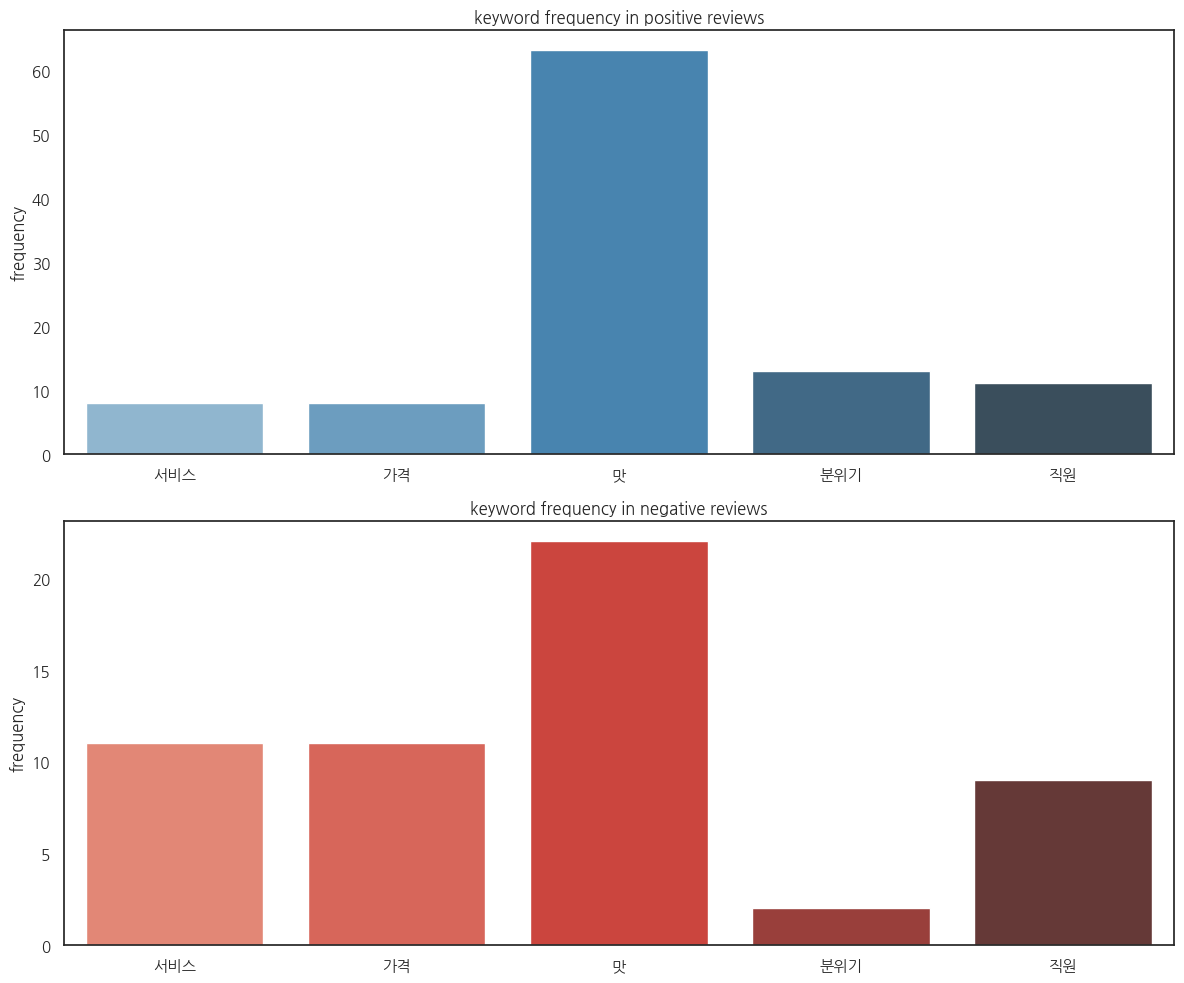

In [49]:
import seaborn as sns

fig, ax = plt.subplots(2, 1, figsize=(12,10))

sns.set(font='NanumGothic', rc={"axes.unicode_minus": False}, style='white')

# positive reviews
sns.barplot(x=list(positive_keyword_counts.keys()), y=list(positive_keyword_counts.values()),
            ax=ax[0], palette='Blues_d')
ax[0].set_title('keyword frequency in positive reviews')
ax[0].set_ylabel('frequency')

# negative reviews
sns.barplot(x=list(negative_keyword_counts.keys()), y=list(negative_keyword_counts.values()),
            ax=ax[1], palette='Reds_d')
ax[1].set_title('keyword frequency in negative reviews')
ax[1].set_ylabel('frequency')

plt.tight_layout()
plt.show()

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [59]:
# corpus 에서 tfidf 점수가 가장 높은 상위 top_n개의 단어를 반환하는 함수

def get_top_tfidf_features(corpus, top_n):
    # tfidf 행렬 생성
    tfidf_vec = TfidfVectorizer().fit(corpus)
    transformed = tfidf_vec.transform(corpus)
    mean_tfidf = transformed.mean(axis=0).tolist()[0]
    # transformed 행렬의 각 열의 평균 tfidf 값 계산 >> list 로 변환
    sorted_tfidf_index = np.argsort(mean_tfidf)[-top_n:]
    # 상위 top_n
    sorted_tfidf_values = [mean_tfidf[i] for i in sorted_tfidf_index]
    # 상위 top_n 단어에 해당하는 평균 tfidf 값을 리스트에 담기
    sorted_tfidf_features= [tfidf_vec.get_feature_names_out()[i] for i in sorted_tfidf_index]
    # 상위 top_n 단어 자체를 담은 리스트
    return list(zip(sorted_tfidf_features, sorted_tfidf_values))
    # 상위 top_n 단어와 그에 대응한 tfidf 값 >> 튜플(tuple) 결합 >> 리스트 변환

In [60]:
get_top_tfidf_features(train_data['comment'], top_n=10)

[('그냥', 0.013687376648590823),
 ('정말', 0.014749058066344665),
 ('좋아요', 0.014972658609432315),
 ('음식이', 0.016910584461841013),
 ('왔는데', 0.017129225820536793),
 ('이런', 0.019819055177452128),
 ('같아요', 0.020639435969586076),
 ('진짜', 0.024167310616650294),
 ('여기', 0.031209780984430707),
 ('너무', 0.0423360133498254)]

In [61]:
top_tfidf_features = get_top_tfidf_features(train_data['comment'], top_n=10)
top_tfidf_features

[('그냥', 0.013687376648590823),
 ('정말', 0.014749058066344665),
 ('좋아요', 0.014972658609432315),
 ('음식이', 0.016910584461841013),
 ('왔는데', 0.017129225820536793),
 ('이런', 0.019819055177452128),
 ('같아요', 0.020639435969586076),
 ('진짜', 0.024167310616650294),
 ('여기', 0.031209780984430707),
 ('너무', 0.0423360133498254)]

In [63]:
get_top_tfidf_features(train_data[train_data['label']==1]['comment'], top_n=10)

[('좋은', 0.015794573515558488),
 ('왔는데', 0.016700611449025134),
 ('같아요', 0.01877905877210045),
 ('맛있어요', 0.020917787452746327),
 ('이런', 0.022451006535394235),
 ('정말', 0.025829318842390096),
 ('좋아요', 0.025855855648262004),
 ('너무', 0.034610136670802),
 ('진짜', 0.037387900220376004),
 ('여기', 0.04163214429506404)]

In [64]:
top_tfidf_positive = get_top_tfidf_features(train_data[train_data['label']==1]['comment'], top_n=10)
top_tfidf_negative = get_top_tfidf_features(train_data[train_data['label']==0]['comment'], top_n=10)

In [65]:
top_tfidf_positive, top_tfidf_negative

([('좋은', 0.015794573515558488),
  ('왔는데', 0.016700611449025134),
  ('같아요', 0.01877905877210045),
  ('맛있어요', 0.020917787452746327),
  ('이런', 0.022451006535394235),
  ('정말', 0.025829318842390096),
  ('좋아요', 0.025855855648262004),
  ('너무', 0.034610136670802),
  ('진짜', 0.037387900220376004),
  ('여기', 0.04163214429506404)],
 [('이렇게', 0.015448051934657724),
  ('별로였어요', 0.017845587667163616),
  ('맛이', 0.02009740100089326),
  ('이런', 0.020486778220176298),
  ('왔는데', 0.020911414159821392),
  ('그냥', 0.02315386264694077),
  ('여기', 0.023508509590134744),
  ('같아요', 0.026674037078069108),
  ('음식이', 0.028554791673134402),
  ('너무', 0.05873634746611193)])

In [67]:
# test

corpus = [
    "I love machine learning and artificial intelligence",
    "Machine learning is fascinating",
    "I love learning new things about Gen-AI and ML"
]

In [69]:
get_top_tfidf_features(corpus, top_n=5)

[('is', 0.194827633673355),
 ('and', 0.21797712997197954),
 ('love', 0.21797712997197954),
 ('machine', 0.2736150192293466),
 ('learning', 0.2843470255464275)]

여기서 잠깐
- argsort()

In [52]:
import numpy as np

# 예시 배열
arr = np.array([10,3,5,2])
arr

array([10,  3,  5,  2])

In [57]:
sorted_index = np.argsort(arr)
sorted_index
# 배열을 정렬했을 때(오름차순)
# [2,3,5,10]
# 인덱스를 반환

array([3, 1, 2, 0])

In [58]:
sorted_index[-2:]

array([2, 0])